In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
def read_car_data():
    data = pd.read_csv('Indo_car_dataset1.csv', delimiter=';')
    return data

In [ ]:
data = read_car_data()
data.head()

,ENGINE SIZE (L),CYLINDERS,COMB (L/100 km),CO2 EMISSIONS
0,2.0,4,18.3,318
1,2.0,4,18.5,321
2,2.5,4,18.7,324
3,2.5,4,18.8,327
4,2.0,4,17.6,305


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ENGINE SIZE (L)  380 non-null    float64
 1   CYLINDERS        380 non-null    int64  
 2   COMB (L/100 km)  380 non-null    float64
 3   CO2 EMISSIONS    380 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 12.0 KB


In [ ]:
data.describe()

,ENGINE SIZE (L),CYLINDERS,COMB (L/100 km),CO2 EMISSIONS
count,380.000000,380.000000,380.000000,380.000000
mean,1.692632,3.960526,9.311500,218.968421
std,0.530493,0.424848,3.763543,71.563054
min,1.000000,3.000000,4.300000,88.000000
25%,1.300000,4.000000,6.975000,160.750000
50%,1.500000,4.000000,8.000000,222.500000
75%,2.000000,4.000000,10.200000,276.000000
max,3.500000,6.000000,18.800000,380.000000


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


# Load your dataset into a DataFrame (replace 'your_dataset.csv' with the actual file path)
Indo_car_dataset = pd.read_csv('Indo_car_dataset1.csv', delimiter=';')

# Select columns for normalization
columns_to_normalize = ['ENGINE SIZE (L)', 'CYLINDERS', 'COMB (L/100 km)', 'CO2 EMISSIONS']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected columns
Indo_car_dataset[columns_to_normalize] = scaler.fit_transform(Indo_car_dataset[columns_to_normalize])

# Display the normalized DataFrame
print("Normalized DataFrame:")
print(Indo_car_dataset)

# Save the normalized data to a new CSV file (replace 'normalized_dataset.csv' with your desired file name)
normalized_file_path = 'normalized_dataset.csv'
Indo_car_dataset.to_csv(normalized_file_path, index=False)

print(f"\nNormalized data saved to {normalized_file_path}")

Normalized DataFrame:
     ENGINE SIZE (L)  CYLINDERS  COMB (L/100 km)  CO2 EMISSIONS
0                0.4   0.333333         0.965517       0.787671
1                0.4   0.333333         0.979310       0.797945
2                0.6   0.333333         0.993103       0.808219
3                0.6   0.333333         1.000000       0.818493
4                0.4   0.333333         0.917241       0.743151
..               ...        ...              ...            ...
375              0.2   0.333333         0.193103       0.116438
376              0.2   0.333333         0.200000       0.136986
377              0.2   0.333333         0.193103       0.116438
378              0.2   0.333333         0.200000       0.136986
379              0.2   0.333333         0.193103       0.116438

[380 rows x 4 columns]

Normalized data saved to normalized_dataset.csv


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load preprocessed data
data = pd.read_csv("normalized_dataset.csv")

# Separate features and target
features = data.drop("CO2 EMISSIONS", axis=1)
target = data["CO2 EMISSIONS"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss="mse",
    optimizer="adam",
    metrics=["mae", "mse"],
)

# Train the model
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae, mse = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")

# Save the model
model.save("co2_emission_predictor.h5")

Epoch 1/500
10/10 [==============================] - 1s 16ms/step - loss: 0.1619 - mae: 0.3300 - mse: 0.1619 - val_loss: 0.0798 - val_mae: 0.2382 - val_mse: 0.0798
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0560 - mae: 0.1870 - mse: 0.0560 - val_loss: 0.0445 - val_mae: 0.1734 - val_mse: 0.0445
Epoch 3/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0537 - mae: 0.1939 - mse: 0.0537 - val_loss: 0.0426 - val_mae: 0.1641 - val_mse: 0.0426
Epoch 4/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0449 - mae: 0.1696 - mse: 0.0449 - val_loss: 0.0438 - val_mae: 0.1606 - val_mse: 0.0438
Epoch 5/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0408 - mae: 0.1570 - mse: 0.0408 - val_loss: 0.0414 - val_mae: 0.1568 - val_mse: 0.0414
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0378 - mae: 0.1536 - mse: 0.0378 - val_loss: 0.0416 - val_mae: 0.1572 - val_mse: 0.0416
Epoch 7/500
10/10 [==

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [CO2 EMISSION]')
  plt.legend()
  plt.grid(True)

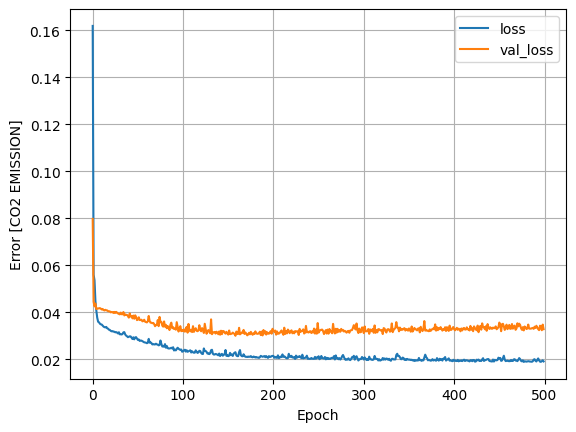

In [ ]:
plot_loss(history)

In [ ]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model("co2_emission_predictor.h5")

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model

with open("co2_emission_predictor.tflite", "wb") as f:
    f.write(tflite_model)

print("Model converted to TFLite successfully!")

Model converted to TFLite successfully!


In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

data = pd.read_csv("normalized_dataset.csv")

features = data.drop("CO2 EMISSIONS", axis=1)
target = data["CO2 EMISSIONS"]

X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = tf.keras.models.load_model("co2_emission_predictor.h5")

loss, mae, mse = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation MAE: {mae:.4f}")
print(f"Validation MSE: {mse:.4f}")

predictions = model.predict(X_val)

# Print some predicted values
for i in range(10):
    print(f"Actual: {y_val.iloc[i]}, Predicted: {predictions[i][0]:.4f}")

2/2 [==============================] - 0s 6ms/step - loss: 0.0203 - mae: 0.0927 - mse: 0.0203
Validation Loss: 0.0203
Validation MAE: 0.0927
Validation MSE: 0.0203
2/2 [==============================] - 0s 4ms/step
Actual: 0.5410958904109588, Predicted: 0.2684
Actual: 0.7054794520547946, Predicted: 0.7086
Actual: 0.4178082191780822, Predicted: 0.4140
Actual: 0.5136986301369862, Predicted: 0.4663
Actual: 0.4623287671232876, Predicted: 0.4771
Actual: 0.1506849315068493, Predicted: 0.2342
Actual: 0.5, Predicted: 0.3192
Actual: 0.7945205479452054, Predicted: 0.7597
Actual: 0.6815068493150684, Predicted: 0.6833
Actual: 0.9178082191780822, Predicted: 0.6685
